In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 10

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,162 (20.16 KB)

 Trainable params: 5,162 (20.16 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
33/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1473 - loss: 2.2540   
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1583 - loss: 2.2390 - val_accuracy: 0.2935 - val_loss: 2.0194
Epoch 2/1000
30/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2609 - loss: 2.0392 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2764 - loss: 2.0157 - val_accuracy: 0.5353 - val_loss: 1.6548
Epoch 3/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3887 - loss: 1.7640 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3892 - loss: 1.7624 - val_accuracy: 0.6855 - val_loss: 1.2944
Epoch 4/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4504 - loss: 1.5160 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9928 - loss: 0.1483


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[9.8115735e-02 2.1736993e-07 2.9770064e-10 1.9378485e-09 2.2650176e-05
 4.5616910e-04 1.3848304e-02 8.8718027e-01 8.7364897e-05 2.8936286e-04]
7


# Confusion matrix

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step


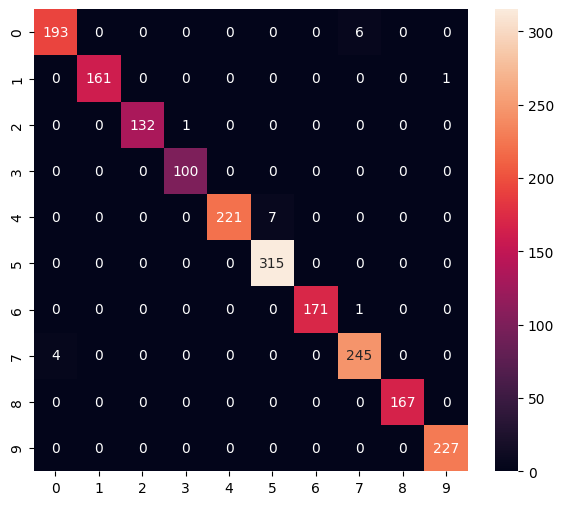

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       199
           1       1.00      0.99      1.00       162
           2       1.00      0.99      1.00       133
           3       0.99      1.00      1.00       100
           4       1.00      0.97      0.98       228
           5       0.98      1.00      0.99       315
           6       1.00      0.99      1.00       172
           7       0.97      0.98      0.98       249
           8       1.00      1.00      1.00       167
           9       1.00      1.00      1.00       227

    accuracy                           0.99      1952
   macro avg       0.99      0.99      0.99      1952
weighted avg       0.99      0.99      0.99      1952



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmpl14fgvzi\assets


INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmpl14fgvzi\assets


Saved artifact at 'C:\Users\DELL\AppData\Local\Temp\tmpl14fgvzi'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2508265693328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2508265691408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2508265691984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2508265689296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2508265696592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2508265699088: TensorSpec(shape=(), dtype=tf.resource, name=None)


9736

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\DELL\Downloads\chandu\githubproject\hand-gesture-recognition-mediapipe-main\.venv\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8953880e-02 2.0132892e-07 2.6623828e-10 1.8127886e-09 2.2623650e-05
 4.6039707e-04 1.4291365e-02 8.8587105e-01 9.0701273e-05 3.0976839e-04]
7
